In [1]:
from pandas import read_csv
import numpy as np
import pandas as pd 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib as plt
import warnings
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
filename=pd.read_csv('glass.csv')

In [3]:
filename1=filename.copy()

In [4]:
filename1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
labelencoder=LabelEncoder()

In [6]:
filename1.iloc[:,-1]=labelencoder.fit_transform(filename1.iloc[:,-1])

In [7]:
filename1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


In [8]:
filename1.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,5
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,5
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,5
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,5
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,5


# One Hot Encoder

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
filename2=filename1.copy()

In [11]:
filename2.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


In [12]:
names=['RI','Na','Mg','Ai','Si','K','Ca','Ba','Fe','Type']

In [13]:
filename2.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [14]:
array=filename2.values
X=array[:,0:9]
Y=array[:,9]

In [15]:
num_fold=10
kfold=KFold(n_splits=10)

In [18]:
model=KNeighborsClassifier(n_neighbors=17)
result=cross_val_score(model,X,Y,cv=kfold)

In [19]:
print(result.mean())

0.43311688311688296


# Grid Search for Algorithm Tunning

In [20]:
import numpy
from sklearn.model_selection import GridSearchCV

In [21]:
n_neighbors=numpy.array(range(1,40))
param_grid=dict(n_neighbors=n_neighbors)

In [22]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [26]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


# Visualizing the CV results

In [27]:
#Choose k between 1 to 41
k_range=range(1,41)
k_score=[]

In [30]:
#Use iteration to calculator different k i models,then return the average accuracy based on the cross on the validation
for k in k_range:
    KNN=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(KNN,X,Y,cv=5)
    k_score.append(scores.mean())

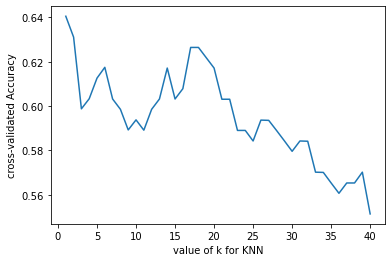

In [33]:
#PLot to see clearly
plt.plot(k_range,k_score)
plt.xlabel('value of k for KNN')
plt.ylabel('cross-validated Accuracy')
plt.show()